In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [186]:
train_X = pd.read_excel('.\\preprocess\\train_x_data.xlsx')
train_y = pd.read_excel('.\\preprocess\\train_y_data.xlsx')
test_X = pd.read_excel('.\\preprocess\\test_x_data.xlsx')
test_y = pd.read_excel('.\\preprocess\\test_y_data.xlsx')

train_X

,Date,days_since_start,SPYG,Cocoa,Coffee,Cotton,Sugar,Oats,Rough Rice,Soybeans,Kansas Wheat,Copper,Gold,Palladium,Platinum,Silver,Natural Gas,Feeder Cattle,Lean Hogs,Live Cattle
0,2018-01-02,0,33.279999,1936,130.199997,77.500000,15.330000,242.50,1153.5,955.00,434.75,3.2560,1313.699951,1090.000000,943.799988,17.121000,3.056,149.524994,70.724998,123.349998
1,2018-01-03,1,33.570000,1907,128.600006,78.110001,15.310000,244.50,1141.0,959.75,441.00,3.2370,1316.199951,1086.000000,957.799988,17.184999,3.008,149.375000,71.050003,122.949997
2,2018-01-04,2,33.700001,1905,129.550003,79.250000,15.250000,245.75,1147.5,959.25,439.75,3.2425,1319.400024,1097.400024,966.099976,17.188999,2.880,149.024994,71.375000,122.250000
3,2018-01-05,3,34.029999,1895,128.449997,78.010002,15.080000,248.50,1156.5,961.50,437.50,3.2070,1320.300049,1084.849976,971.200012,17.205000,2.795,146.625000,71.425003,119.250000
4,2018-01-08,6,34.099998,1914,125.150002,78.139999,14.780000,250.00,1164.5,958.25,433.25,3.2010,1318.599976,1098.550049,972.299988,17.063999,2.835,146.449997,72.974998,117.224998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,2023-06-26,2001,59.279999,3206,167.949997,77.070000,23.719999,391.25,1794.0,1521.00,866.50,3.7865,1923.699951,1291.800049,936.700012,22.805000,2.791,233.675003,93.400002,177.699997
1343,2023-06-27,2002,59.930000,3212,169.449997,77.639999,23.030001,385.00,1767.5,1495.00,837.75,3.7815,1914.000000,1283.199951,936.599976,22.938999,2.763,238.500000,94.125000,179.300003
1344,2023-06-28,2003,60.000000,3292,165.649994,80.120003,22.570000,377.00,1748.5,1451.00,800.75,3.7205,1912.300049,1236.000000,923.400024,22.868000,2.603,240.250000,94.275002,179.625000
1345,2023-06-29,2004,60.209999,3218,163.600006,81.250000,22.070000,367.75,1770.5,1483.00,794.25,3.6775,1909.199951,1218.800049,897.799988,22.591000,2.701,242.375000,95.449997,179.750000


In [187]:
import pandas as pd
import numpy as np

time_columns=['sin_month','cos_month', 'day_of_week','days_since_start','sin_day_of_week','cos_day_of_week']

# Date 컬럼을 날짜 형식으로 변환
train_X['Date'] = pd.to_datetime(train_X['Date'])
test_X['Date'] = pd.to_datetime(test_X['Date'])


# 월(Month) 추출
train_X['Month'] = train_X['Date'].dt.month
test_X['Month'] = test_X['Date'].dt.month

# 월 주기 변환 (sin, cos)
train_X['sin_month'] = np.sin(2 * np.pi * train_X['Month'] / 12)
train_X['cos_month'] = np.cos(2 * np.pi * train_X['Month'] / 12)

test_X['sin_month'] = np.sin(2 * np.pi * test_X['Month'] / 12)
test_X['cos_month'] = np.cos(2 * np.pi * test_X['Month'] / 12)

print(train_X.head())
test_X.head()

        Date  days_since_start       SPYG  Cocoa      Coffee     Cotton  \
0 2018-01-02                 0  33.279999   1936  130.199997  77.500000   
1 2018-01-03                 1  33.570000   1907  128.600006  78.110001   
2 2018-01-04                 2  33.700001   1905  129.550003  79.250000   
3 2018-01-05                 3  34.029999   1895  128.449997  78.010002   
4 2018-01-08                 6  34.099998   1914  125.150002  78.139999   

   Sugar    Oats  Rough Rice  Soybeans  ...    Palladium    Platinum  \
0  15.33  242.50      1153.5    955.00  ...  1090.000000  943.799988   
1  15.31  244.50      1141.0    959.75  ...  1086.000000  957.799988   
2  15.25  245.75      1147.5    959.25  ...  1097.400024  966.099976   
3  15.08  248.50      1156.5    961.50  ...  1084.849976  971.200012   
4  14.78  250.00      1164.5    958.25  ...  1098.550049  972.299988   

      Silver  Natural Gas  Feeder Cattle  Lean Hogs  Live Cattle  Month  \
0  17.121000        3.056     149.524994 

,Date,days_since_start,SPYG,Cocoa,Coffee,Cotton,Sugar,Oats,Rough Rice,Soybeans,...,Palladium,Platinum,Silver,Natural Gas,Feeder Cattle,Lean Hogs,Live Cattle,Month,sin_month,cos_month
0,2023-07-03,1998,61.049999,3364,162.500000,83.430000,23.320000,379.25,1804.5,1562.00,...,1218.400024,909.299988,22.896000,2.709,247.899994,97.824997,176.824997,7,-0.5,-0.866025
1,2023-07-05,2000,60.939999,3334,161.050003,82.449997,23.530001,402.50,1827.0,1547.25,...,1249.300049,918.099976,23.197001,2.657,244.699997,101.275002,174.949997,7,-0.5,-0.866025
2,2023-07-06,2001,60.470001,3277,162.350006,82.879997,23.250000,416.75,1864.0,1525.75,...,1230.800049,904.500000,22.686001,2.609,242.274994,100.050003,174.574997,7,-0.5,-0.866025
3,2023-07-07,2002,60.240002,3274,162.800003,81.199997,23.530001,406.25,1868.5,1485.50,...,1236.500000,910.099976,23.091999,2.582,245.425003,99.000000,177.000000,7,-0.5,-0.866025
4,2023-07-10,2005,60.209999,3299,161.750000,79.949997,23.440001,414.00,1910.0,1508.00,...,1228.099976,929.200012,23.150999,2.669,246.250000,98.800003,177.199997,7,-0.5,-0.866025


In [188]:
# 요일 계산 (days_since_start를 7로 나눈 나머지)
train_X['day_of_week'] = train_X['days_since_start'] % 7
test_X['day_of_week'] = test_X['days_since_start'] % 7


# 요일 주기 변환 (sin, cos)
train_X['sin_day_of_week'] = np.sin(2 * np.pi * train_X['day_of_week'] / 7)
train_X['cos_day_of_week'] = np.cos(2 * np.pi * train_X['day_of_week'] / 7)

test_X['sin_day_of_week'] = np.sin(2 * np.pi * test_X['day_of_week'] / 7)
test_X['cos_day_of_week'] = np.cos(2 * np.pi * test_X['day_of_week'] / 7)

print(train_X.head())
test_X.head()


        Date  days_since_start       SPYG  Cocoa      Coffee     Cotton  \
0 2018-01-02                 0  33.279999   1936  130.199997  77.500000   
1 2018-01-03                 1  33.570000   1907  128.600006  78.110001   
2 2018-01-04                 2  33.700001   1905  129.550003  79.250000   
3 2018-01-05                 3  34.029999   1895  128.449997  78.010002   
4 2018-01-08                 6  34.099998   1914  125.150002  78.139999   

   Sugar    Oats  Rough Rice  Soybeans  ...  Natural Gas  Feeder Cattle  \
0  15.33  242.50      1153.5    955.00  ...        3.056     149.524994   
1  15.31  244.50      1141.0    959.75  ...        3.008     149.375000   
2  15.25  245.75      1147.5    959.25  ...        2.880     149.024994   
3  15.08  248.50      1156.5    961.50  ...        2.795     146.625000   
4  14.78  250.00      1164.5    958.25  ...        2.835     146.449997   

   Lean Hogs  Live Cattle  Month  sin_month  cos_month  day_of_week  \
0  70.724998   123.349998  

,Date,days_since_start,SPYG,Cocoa,Coffee,Cotton,Sugar,Oats,Rough Rice,Soybeans,...,Natural Gas,Feeder Cattle,Lean Hogs,Live Cattle,Month,sin_month,cos_month,day_of_week,sin_day_of_week,cos_day_of_week
0,2023-07-03,1998,61.049999,3364,162.500000,83.430000,23.320000,379.25,1804.5,1562.00,...,2.709,247.899994,97.824997,176.824997,7,-0.5,-0.866025,3,0.433884,-0.900969
1,2023-07-05,2000,60.939999,3334,161.050003,82.449997,23.530001,402.50,1827.0,1547.25,...,2.657,244.699997,101.275002,174.949997,7,-0.5,-0.866025,5,-0.974928,-0.222521
2,2023-07-06,2001,60.470001,3277,162.350006,82.879997,23.250000,416.75,1864.0,1525.75,...,2.609,242.274994,100.050003,174.574997,7,-0.5,-0.866025,6,-0.781831,0.623490
3,2023-07-07,2002,60.240002,3274,162.800003,81.199997,23.530001,406.25,1868.5,1485.50,...,2.582,245.425003,99.000000,177.000000,7,-0.5,-0.866025,0,0.000000,1.000000
4,2023-07-10,2005,60.209999,3299,161.750000,79.949997,23.440001,414.00,1910.0,1508.00,...,2.669,246.250000,98.800003,177.199997,7,-0.5,-0.866025,3,0.433884,-0.900969


In [189]:
# 결측치 확인
print(train_X.isnull().sum())
print(train_y.isnull().sum())
print(test_X.isnull().sum())
print(test_y.isnull().sum())

Date                0
days_since_start    0
SPYG                0
Cocoa               0
Coffee              0
Cotton              0
Sugar               0
Oats                0
Rough Rice          0
Soybeans            0
Kansas Wheat        0
Copper              0
Gold                0
Palladium           0
Platinum            0
Silver              0
Natural Gas         0
Feeder Cattle       0
Lean Hogs           0
Live Cattle         0
Month               0
sin_month           0
cos_month           0
day_of_week         0
sin_day_of_week     0
cos_day_of_week     0
dtype: int64
Brent Crude Oil    0
dtype: int64
Date                0
days_since_start    0
SPYG                0
Cocoa               0
Coffee              0
Cotton              0
Sugar               0
Oats                0
Rough Rice          0
Soybeans            0
Kansas Wheat        0
Copper              0
Gold                0
Palladium           0
Platinum            0
Silver              0
Natural Gas         0
Feeder 

In [190]:
# 데이터 통합
train_data = pd.concat([train_X, train_y], axis=1)
test_data = pd.concat([test_X, test_y], axis=1)

# 상관관계 계산
correlation = train_data.corr()

# 타겟 변수와의 상관관계 추출
correlation_with_target = correlation['Brent Crude Oil'].sort_values(ascending=False)
print("타겟 변수와의 상관관계:\n", correlation_with_target)

# 상관관계 계산
correlation = train_data.corr()

# 타겟 변수와의 상관관계 추출
correlation_with_target = correlation['Brent Crude Oil'].sort_values(ascending=False)
print("타겟 변수와의 상관관계:\n", correlation_with_target)


타겟 변수와의 상관관계:
 Brent Crude Oil     1.000000
Cotton              0.819240
Kansas Wheat        0.782843
Natural Gas         0.745098
Coffee              0.731278
Soybeans            0.687027
Lean Hogs           0.672630
Live Cattle         0.638459
Copper              0.620224
Oats                0.613573
Feeder Cattle       0.594026
Sugar               0.584207
Date                0.442988
days_since_start    0.442988
Rough Rice          0.415543
SPYG                0.404252
Platinum            0.270246
Silver              0.176611
Gold                0.127774
Cocoa               0.085087
sin_day_of_week     0.016459
sin_month           0.011236
cos_day_of_week    -0.010879
day_of_week        -0.015411
Palladium          -0.030591
Month              -0.038910
cos_month          -0.070356
Name: Brent Crude Oil, dtype: float64
타겟 변수와의 상관관계:
 Brent Crude Oil     1.000000
Cotton              0.819240
Kansas Wheat        0.782843
Natural Gas         0.745098
Coffee              0.731278
Soyb

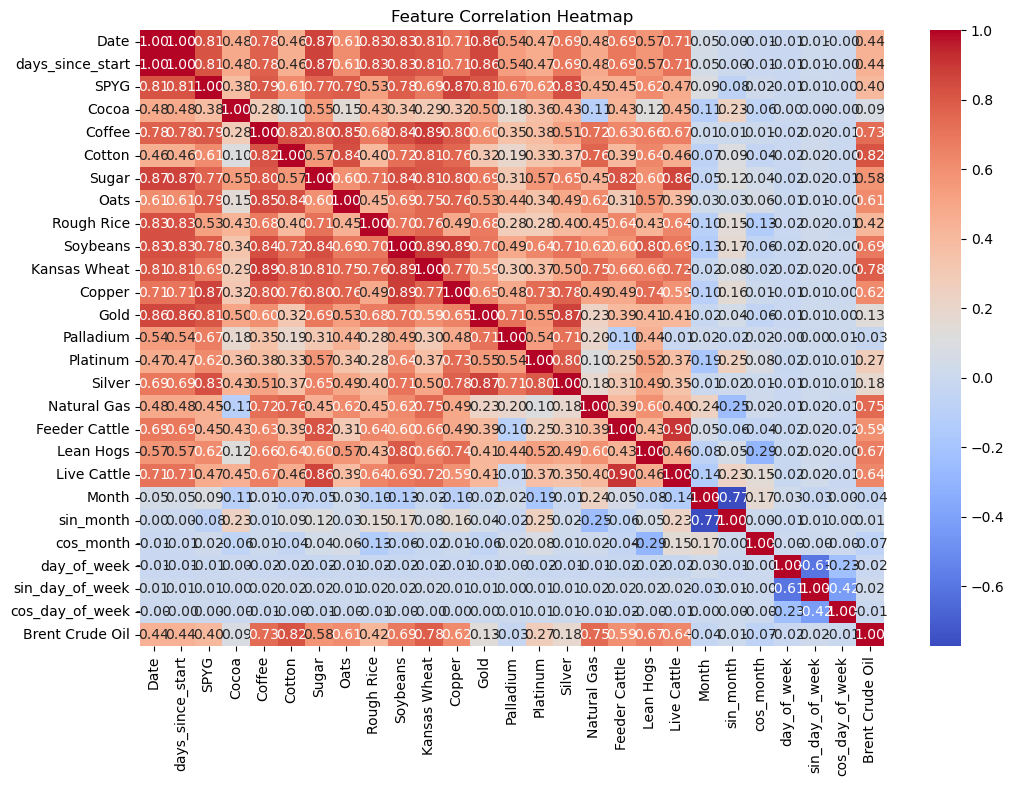

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [192]:
# 타겟 변수 제외한 상관관계 기반 Feature Selection
threshold=0.5
correlation_with_target = correlation['Brent Crude Oil'].drop(labels=['Brent Crude Oil'])
selected_features = correlation_with_target[correlation_with_target.abs() > threshold].index.tolist()
# selected_features.remove('Date')
print("선택된 변수들:", selected_features)
print("시간 변수:",time_columns)

선택된 변수들: ['Coffee', 'Cotton', 'Sugar', 'Oats', 'Soybeans', 'Kansas Wheat', 'Copper', 'Natural Gas', 'Feeder Cattle', 'Lean Hogs', 'Live Cattle']
시간 변수: ['sin_month', 'cos_month', 'day_of_week', 'days_since_start', 'sin_day_of_week', 'cos_day_of_week']


In [193]:
# 피처 셀렉션
# selected_train_X=train_X[selected_features+time_columns]
# selected_test_X=test_X[selected_features+time_columns]
selected_train_X=train_X[selected_features+['sin_day_of_week']]
selected_test_X=test_X[selected_features+['sin_day_of_week']]

selected_test_X

,Coffee,Cotton,Sugar,Oats,Soybeans,Kansas Wheat,Copper,Natural Gas,Feeder Cattle,Lean Hogs,Live Cattle,sin_day_of_week
0,162.500000,83.430000,23.320000,379.25,1562.00,798.75,3.7790,2.709,247.899994,97.824997,176.824997,0.433884
1,161.050003,82.449997,23.530001,402.50,1547.25,849.25,3.7535,2.657,244.699997,101.275002,174.949997,-0.974928
2,162.350006,82.879997,23.250000,416.75,1525.75,843.25,3.7200,2.609,242.274994,100.050003,174.574997,-0.781831
3,162.800003,81.199997,23.530001,406.25,1485.50,817.50,3.7670,2.582,245.425003,99.000000,177.000000,0.000000
4,161.750000,79.949997,23.440001,414.00,1508.00,810.50,3.7715,2.669,246.250000,98.800003,177.199997,0.433884
...,...,...,...,...,...,...,...,...,...,...,...,...
245,238.000000,71.290001,19.410000,308.50,1175.25,581.50,4.5270,2.811,258.899994,89.949997,188.899994,0.433884
246,231.199997,72.599998,19.100000,304.75,1163.25,576.00,4.3810,2.756,259.049988,89.000000,189.475006,-0.433884
247,226.350006,72.699997,19.240000,294.50,1162.75,580.00,4.3675,2.628,261.774994,89.900002,192.925003,-0.974928
248,228.250000,72.019997,20.120001,304.00,1152.25,592.00,4.3285,2.685,260.649994,89.449997,194.175003,-0.781831


In [194]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터 표준화
train_X_scaled = scaler.fit_transform(selected_train_X)
test_X_scaled = scaler.transform(selected_test_X)
train_y_scaled = scaler.fit_transform(train_y)
test_y_scaled = scaler.transform(test_y)

# 표준화된 결과 확인
print(train_X_scaled[:5])  # 첫 5개 행 출력

[[-0.31896259 -0.30428429 -0.065912   -0.90395425 -0.74203782 -0.95273171
  -0.19448044 -0.25792155 -0.19937907 -0.350508   -0.05303156 -0.47966148]
 [-0.35243856 -0.27476546 -0.07108287 -0.89014585 -0.72563201 -0.92318337
  -0.22114479 -0.28513215 -0.20632476 -0.33254535 -0.07342589  0.78667477]
 [-0.33256215 -0.21959921 -0.08659597 -0.8815156  -0.72735893 -0.92909304
  -0.21342607 -0.35769349 -0.22253229 -0.31458312 -0.10911567  1.09943399]
 [-0.35557715 -0.27960453 -0.13054947 -0.86252905 -0.71958776 -0.93973044
  -0.26324623 -0.40587886 -0.33366747 -0.31181951 -0.26207253  0.22310212]
 [-0.42462164 -0.27331378 -0.20811447 -0.85217275 -0.73081279 -0.95982332
  -0.27166659 -0.38320342 -0.34177124 -0.22615294 -0.36531849 -1.74599773]]


## 윈도우 크기 결정

In [195]:
def create_windows(X, y, window_size):
    X_windows, y_windows = [], []
    for i in range(len(X) - window_size):
        X_windows.append(X[i:i + window_size])  # .iloc 대신 기본 인덱싱 사용
        y_windows.append(y[i + window_size])    # .iloc 대신 기본 인덱싱 사용
    return np.array(X_windows), np.array(y_windows)

In [196]:
# 윈도우 크기
window_size = 15

# Train 데이터 슬라이싱
X_train, y_train = create_windows(
    train_X_scaled,  
    train_y_scaled,  
    window_size
)

# Test 데이터 슬라이싱
X_test, y_test = create_windows(
    test_X_scaled,  
    test_y_scaled,  
    window_size
)

# 결과 확인
print(f"Train X Shape: {X_train.shape}, Train y Shape: {y_train.shape}")
print(f"Test X Shape: {X_test.shape}, Test y Shape: {y_test.shape}")

Train X Shape: (1332, 15, 12), Train y Shape: (1332, 1)
Test X Shape: (235, 15, 12), Test y Shape: (235, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dropout, Dense, Bidirectional
from tensorflow.keras import backend as K

# RMSE 정의
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# 모델 정의
model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(window_size, X_train.shape[2])),  # Conv1D 레이어
    Dropout(0.3),
    LSTM(64, activation='relu', return_sequences=True),  # LSTM 레이어
    Dropout(0.3),
    Conv1D(filters=32, kernel_size=3, activation='relu'),  # Conv1D 레이어
    Dropout(0.3),
    LSTM(32, activation='relu'),  # Bidirectional LSTM
    Dense(y_train.shape[1])  # 출력 레이어
])

# 모델 컴파일 (loss에 rmse 사용)
model.compile(optimizer='adam', loss=rmse, metrics=[rmse])

# 모델 요약
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 13, 64)            2368      
                                                                 
 dropout_20 (Dropout)        (None, 13, 64)            0         
                                                                 
 lstm_20 (LSTM)              (None, 13, 64)            33024     
                                                                 
 dropout_21 (Dropout)        (None, 13, 64)            0         
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 47,841
Trainable params: 47,841
Non-tra

In [198]:
from tensorflow.keras.callbacks import ModelCheckpoint

# 체크포인트 콜백 설정
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',  # 모델이 저장될 경로
    monitor='val_loss',        # val_loss 기준으로 모니터링
    save_best_only=True,       # 최적의 모델만 저장
    mode='min',                # val_loss가 최소일 때 저장
    verbose=1                  # 저장 시 출력 메시지
)

# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=256,
    verbose=2,
    callbacks=[checkpoint_callback]  # 콜백 추가
)


Epoch 1/100

Epoch 1: val_loss improved from inf to 0.29985, saving model to best_model.h5
6/6 - 4s - loss: 0.7690 - rmse: 0.7448 - val_loss: 0.2999 - val_rmse: 0.2999 - 4s/epoch - 630ms/step
Epoch 2/100

Epoch 2: val_loss did not improve from 0.29985
6/6 - 0s - loss: 0.5477 - rmse: 0.5497 - val_loss: 0.3701 - val_rmse: 0.3701 - 168ms/epoch - 28ms/step
Epoch 3/100

Epoch 3: val_loss did not improve from 0.29985
6/6 - 0s - loss: 0.4836 - rmse: 0.4820 - val_loss: 0.4421 - val_rmse: 0.4421 - 165ms/epoch - 28ms/step
Epoch 4/100

Epoch 4: val_loss did not improve from 0.29985
6/6 - 0s - loss: 0.4389 - rmse: 0.4338 - val_loss: 0.4088 - val_rmse: 0.4088 - 163ms/epoch - 27ms/step
Epoch 5/100

Epoch 5: val_loss did not improve from 0.29985
6/6 - 0s - loss: 0.3881 - rmse: 0.3950 - val_loss: 0.3979 - val_rmse: 0.3979 - 163ms/epoch - 27ms/step
Epoch 6/100

Epoch 6: val_loss did not improve from 0.29985
6/6 - 0s - loss: 0.3664 - rmse: 0.3657 - val_loss: 0.4589 - val_rmse: 0.4589 - 160ms/epoch - 27m

In [199]:
from tensorflow.keras.models import load_model

# 저장된 최적의 모델 로드
best_model = load_model('best_model.h5', custom_objects={'rmse': rmse})

# 모델 평가
loss, rmse_v = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test RMSE: {rmse_v}")

Test Loss: 0.26769086718559265, Test RMSE: 0.2592701315879822


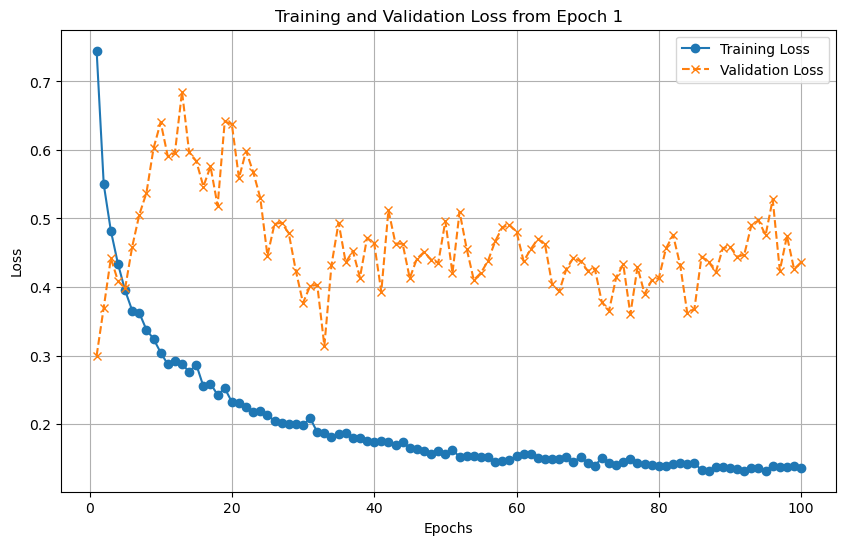

In [200]:
# 원하는 에포크 시작점 설정 (예: 10번째 에포크부터)
start_epoch = 1
history_dict= history.history
# 슬라이싱해서 데이터 제한
epochs = range(start_epoch, len(history_dict['rmse']) + 1)  # 에포크는 10부터 시작
loss = history_dict['rmse'][start_epoch - 1:]              # 10번째 에포크부터
val_loss = history_dict['val_rmse'][start_epoch - 1:]      # 10번째 에포크부터

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x', linestyle='--')
plt.title(f'Training and Validation Loss from Epoch {start_epoch}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


8/8 [==============================] - 0s 4ms/step


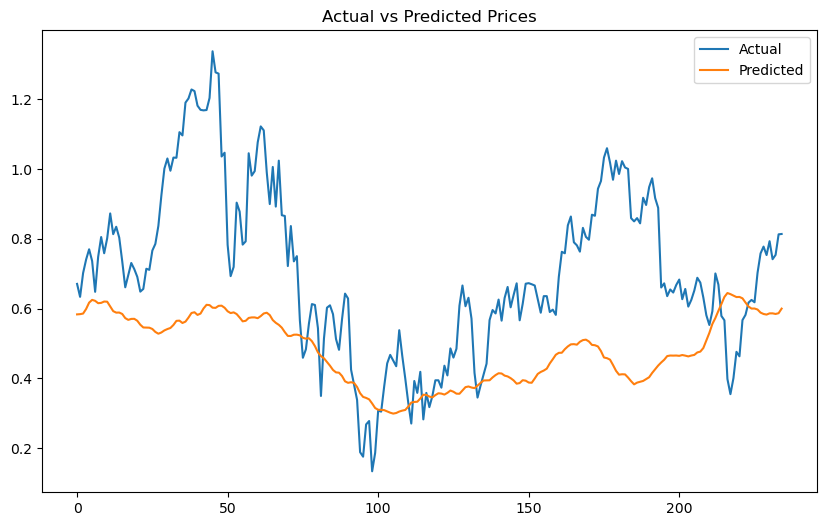

In [201]:
# 예측
y_pred = best_model.predict(X_test)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Prices')
plt.show()

8/8 [==============================] - 0s 4ms/step
복원된 데이터 평가 (RMSE): 6.590958115992392


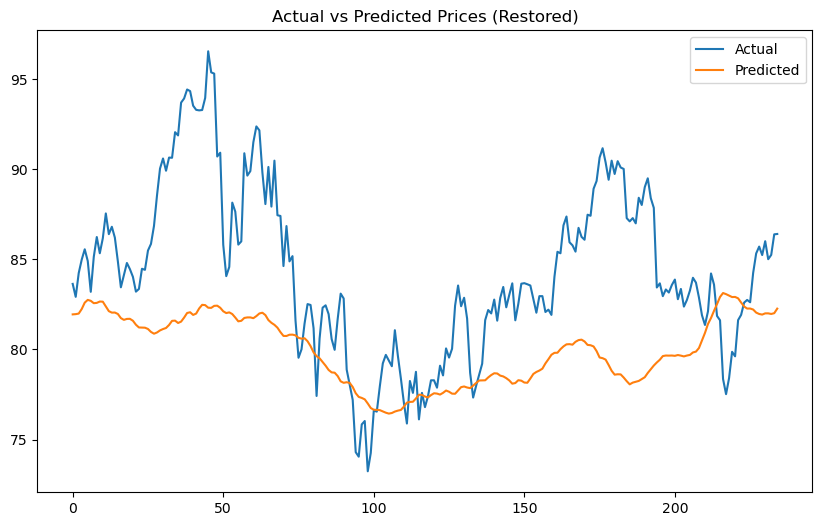

In [202]:
# RMSE 정의
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))  # Keras 없이 NumPy로 계산

# 예측 수행
y_pred_scaled = best_model.predict(X_test)  # 학습된 모델로 예측 (이미 스케일링된 X_test 사용)

# Test 데이터에서 y_pred_scaled와 같은 샘플 수만큼 슬라이싱
y_test_trimmed = test_y[window_size:].to_numpy()  # 원본 y_test 크기 맞추기

# 복원: y_pred_scaled와 pivot_test_X_scaled를 합쳐서 원래 스케일 복원
pivot_test_X_trimmed = test_X_scaled[window_size:]

# 예측 결과와 입력 데이터를 합침
test_combined = np.hstack([pivot_test_X_trimmed, y_pred_scaled])

# 스케일러로 역변환 (y_pred 복원)
test_combined_restored = scaler.inverse_transform(test_combined)
y_pred_restored = test_combined_restored[:, -1]  # 마지막 열이 복원된 y 예측값

# RMSE 계산 (y_test_trimmed은 복원할 필요 없음)
rmse_value = rmse(y_test_trimmed, y_pred_restored)
print("복원된 데이터 평가 (RMSE):", rmse_value)

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_trimmed, label="Actual")
plt.plot(y_pred_restored, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Prices (Restored)")
plt.show()
